# Raport
## Projekt nr 2 (TWD)

Adrianna Grudzień, Jakub Jung, Maria Kałuska, Tomasz Nocoń

### Wprowadzenie

W ramach projektu nr 2 z Technik Wizualizacji Danych pracowaliśmy nad wizualizacją danych związanych z pandemią COVID-19. Jako temat przewodni wybraliśmy ***Transport***. Temat ten uznaliśmy za szczególnie ciekawy, ponieważ nie jest on tak popularny jak inne dziedziny i stosunkowo rzadko się go porusza w mediach. Postanowiliśmy się nim zająć również dlatego, że większość z nas praktycznie na co dzień związana była przed pandemią z jakąś formą transportu - samochodami, pociągami i w końcu komunikacją miejską. Postanowiliśmy przyjrzeć się najciekwszym zależnościom i przeanalizować wpływ pandemii na funkcjonowanie transportu w Polsce.

### 1. Przewozy kolejowe

Wykres przedstawia liczbę pasażerów na przestrzeni miesięcy w latach 2017-2020 korzystającą z usług polskich przewoźników kolejowych.

In [12]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Warning message:
“Removed 3 rows containing missing values (geom_path).”

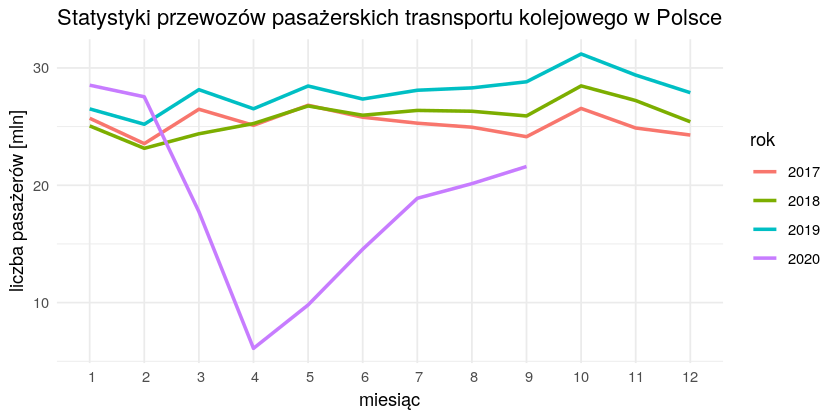

In [13]:
rok <- rep(c("2017","2018","2019","2020"),each=12)
liczba_pasazerow <- c(25.71,23.55,26.48,25.11,26.82,25.8,25.29,24.95,24.14,26.55,24.88,24.28,
                      25.06,23.15,24.39,25.26,26.76,25.97,26.38,26.31,25.91,28.47,27.22,25.41,
                      26.51,25.2,28.15,26.52,28.46,27.35,28.1,28.3,28.82,31.19,29.39,27.89,
                      28.53,27.54,17.75,6.1,9.8,14.55,18.89,20.14,21.6,NaN,NaN,NaN) #nie ma danych z ostatnich trzech miesięcy

miesiace <- rep(1:12,4)
pasazerowie <- data.frame(miesiace,rok,liczba_pasazerow)

options(repr.plot.width = 7, repr.plot.height = 3.5)

ggplot(data=pasazerowie,aes(x=miesiace,y=liczba_pasazerow,group=rok,color=rok)) +
  scale_x_discrete(limits = 1:12) +
  geom_line(size=1)+
  theme_minimal()+
  ggtitle("Statystyki przewozów pasażerskich trasnsportu kolejowego w Polsce") +
  xlab("miesiąc") +
  ylab("liczba pasażerów [mln]") 

### 2. Ceny biletów ZTM

Wykres prezentuje uśredniony udział procentowy biletów jednorazowych w latach 2017-2019  oraz udział procentowy biletów jednorazowych w 2020 roku.

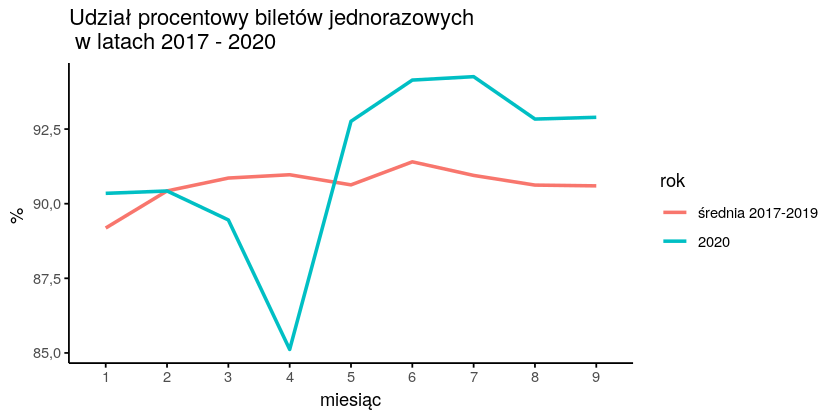

In [17]:
library(ggplot2)

# wczytanie danych

df_2017 <- data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                      l_biletow_dl = c(497080, 418868, 457022, 418741, 459549, 389147, 374528, 398830, 432578),
                      l_biletow_jedn = c(1990344, 2399919, 2767695, 2731703, 2858958, 3002447, 2879621, 2982841, 2624369),
                      l_biletow_czas = c(2743248, 3254748, 3699459, 3630476, 3926011, 4043401, 3860454, 4176525, 3447325),
                      l_biletow_wszystkie = c(5365708, 6262848, 7133433, 6997985, 7513288, 7705856, 7410617, 7899219, 6708109))

df_2018 <- data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                      l_biletow_dl = c(498562, 415973, 430168, 447370, 425274, 394653, 388516, 391950, 442074),
                      l_biletow_jedn = c(2137639, 2307206, 2810794, 2688444, 2816230, 2644717, 2840715, 2768332, 2707566),
                      l_biletow_czas = c(3081365, 3244880, 3616377, 3762728, 3863155, 3741899, 3839056, 3886824, 3680825),
                      l_biletow_wszystkie = c(5856510, 6125454, 7037543, 7102156, 7341540, 6988259, 7340536, 7344414, 7040488))


df_2019 <- data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                      l_biletow_dl = c(491905, 430204, 458437, 437393, 450981, 387951, 403407, 409183, 471092),
                      l_biletow_jedn = c(2359610, 2286652, 2510213, 2736328, 2632765, 2710735, 2821868, 2870990, 2749657),
                      l_biletow_czas = c(3427220, 3289402, 3494849, 3922930, 3720401, 3704072, 3799334, 3905159, 3716242),
                      l_biletow_wszystkie = c(6425792, 6171158, 6629805, 7305451, 7011393, 7020085, 7284763, 7477625, 7141702))

df_2020 <- data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                      l_biletow_dl = c(510453, 444920, 269678, 85988, 171588, 214880, 207798, 264118, 318748),
                      l_biletow_jedn = c(2633615, 2413978, 1151986, 234553, 1133184, 2173193, 2717197, 2370797, 2564480),
                      l_biletow_czas = c(3663544, 3281702, 1627243, 288298, 1499562, 2912192, 3661179, 3292808, 3397818),
                      l_biletow_wszystkie = c(6969993, 6298759, 3106838, 614273, 2838232, 5401876, 6767131, 6100731, 6418385))


# polaczenie ramek danych z lat 2017-2019
df_years_bf <- data.frame()
df_years_bf <- data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                         l_biletow_dl = df_2017$l_biletow_dl, l_biletow_jedn = df_2017$l_biletow_jedn,
                         l_biletow_czas = df_2017$l_biletow_czas, l_biletow_wszystkie = df_2017$l_biletow_wszystkie,
                         rok = rep("2017", 9))

df_years_bf <- rbind(df_years_bf, data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                                             l_biletow_dl = df_2018$l_biletow_dl, l_biletow_jedn = df_2018$l_biletow_jedn,
                                             l_biletow_czas = df_2018$l_biletow_czas, l_biletow_wszystkie = df_2018$l_biletow_wszystkie,
                                             rok = rep("2018", 9)))
df_years_bf <- rbind(df_years_bf, data.frame(miesiac = c("styczen", "luty", "marzec", "kwiecien", "maj", "czerwiec", "lipiec", "sierpien", "wrzesien"),
                                             l_biletow_dl = df_2019$l_biletow_dl, l_biletow_jedn = df_2019$l_biletow_jedn,
                                             l_biletow_czas = df_2019$l_biletow_czas, l_biletow_wszystkie = df_2019$l_biletow_wszystkie,
                                             rok = rep("2019", 9)))
df_years_bf <- cbind(df_years_bf, miesiac_num=rep(1:9, 3))


library(dplyr)

df_years_bf <- df_years_bf %>%
  mutate(l_biletow_kr = l_biletow_jedn + l_biletow_czas)

# procentowy udzial

df_proc_2020 <- df_2020 %>%
  mutate(proc_biletow_dl = l_biletow_dl/l_biletow_wszystkie * 100, 
         proc_biletow_kr = (l_biletow_jedn + l_biletow_czas)/l_biletow_wszystkie * 100, 
         miesiac_num = c(1:9), rok = rep("2020", 9)) %>%
  select(miesiac_num, proc_biletow_dl, proc_biletow_kr, rok)

df_sum <- df_years_bf %>%
  group_by(miesiac_num) %>%
  summarise(suma_biletow_dl = sum(l_biletow_dl), 
            suma_biletow_kr = sum(l_biletow_kr),
            suma_biletow_wszystkie = sum(l_biletow_wszystkie))
df_sum <- cbind(df_sum, rok = rep("średnia 2017-2019"))

df_proc_bf <- df_sum %>%
  mutate(proc_biletow_dl = suma_biletow_dl/suma_biletow_wszystkie * 100, 
            proc_biletow_kr = suma_biletow_kr/suma_biletow_wszystkie * 100) %>%
  select(miesiac_num, proc_biletow_dl, proc_biletow_kr, rok)


df_proc_all <- rbind(df_proc_bf, df_proc_2020)

# options(repr.plot.width = 10, repr.plot.height = 5)

w2 <- ggplot(df_proc_all,aes(x=miesiac_num,y=proc_biletow_kr ,group=rok, color=rok)) +
  scale_x_discrete(limits = 1:9) +
  geom_line(size=1)+
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(colour = "black", linetype = "solid"),
    axis.ticks = element_line(colour = "black")
  ) +
  ggtitle("Udział procentowy biletów jednorazowych\n w latach 2017 - 2020") +
  xlab("miesiąc") +
  ylab("% ")
  
w2
# ggsave("w2_proc.png", plot=w2, dpi=500, units = ("cm"), width = 14, height = 8)


### 3. Turystyka

Wykres pokazuje liczbę osób korzystających z noclegów w obiektach turystycznych (pensjonatach, hotelach, gospodarstwach agroturystycznych itp.) ze względu na miesiąc (od stycznia do września) dla lat 2015 - 2020.
Ciekawą obserwacją jest to, że liczba takich osób w 2020 roku dla sierpnia (a więc w szczycie sezonu letniego) jest prawie równa tej z 2015 roku - kiedy na świecie nie było globalnej pandemii.

In [15]:
# import matplotlib.pylab as plt
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
# import numpy as np
# import pandas as pd

# turystyka = pd.read_csv("C://CSV_Files/Turystyka.csv", sep = ";")
# turystyka = turystyka[["Miesiące", "Rok", "Wartosc"]]
# tur2015 = turystyka[turystyka.Rok == 2015]
# tur2016 = turystyka[turystyka.Rok == 2016]
# tur2017 = turystyka[turystyka.Rok == 2017]
# tur2018 = turystyka[turystyka.Rok == 2018]
# tur2019 = turystyka[turystyka.Rok == 2019]
# tur2020 = turystyka[turystyka.Rok == 2020]

# plt.figure(figsize=(8,5))
# plt.plot("Miesiące", "Wartosc", data = tur2020)
# plt.plot("Miesiące", "Wartosc", data = tur2019)
# plt.plot("Miesiące", "Wartosc", data = tur2018)
# plt.plot("Miesiące", "Wartosc", data = tur2017)
# plt.plot("Miesiące", "Wartosc", data = tur2016)
# plt.plot("Miesiące", "Wartosc", data = tur2015)
# ax = plt.gca()
# ax.get_yaxis().get_major_formatter().set_scientific(False)
# plt.title("Liczba osób korzystających z noclegów w obiektach turystycznych")
# plt.legend([2020, 2019, 2018, 2017, 2016, 2015])
# plt.show()

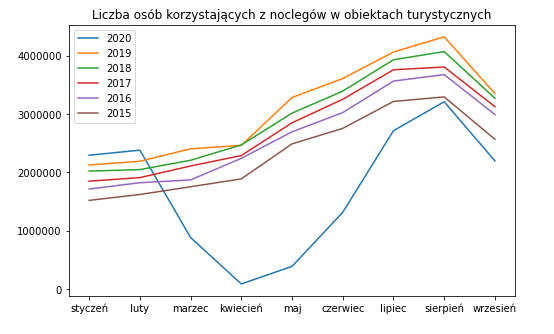

In [16]:
library("IRdisplay")
display_png(file="wKuby.png")  

### 4. Paliwa

Wykres przedstawia zmiany cen paliwa na przestrzeni roku 2020 i ukazuje również średnią cenę paliwa w okresie 2016-2019. Dodatkowo zostały nałożone na wykres informacje na tamat wprowadzanych restrykcji.
- Zmiejszenie kursów lotniczych między Włochami i państwami azjatyckimi 
- Lockdown
Widać wyraźnie, że od lutego ceny paliw są niższe od tych średniej ceny paliwa w 2016-2019 i ten trend utrzymuje się.
TO DO
- zanalizowanie innych paliw niż benzyna i zobaczenie czy jest to również prawda np dla gazu lub diesla.
- Wybranie innych kluczowych dat w kontekście epidemii w miesiącach od maja do listopada

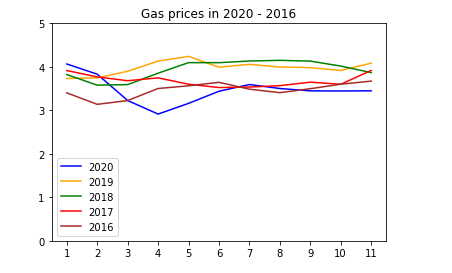

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns

# df = pd.read_csv('oilFinal.csv')
# df1 = pd.read_csv('oilFinal1.csv')
# df2 = pd.read_csv('oilFinal2.csv')
# df3 = pd.read_csv('oilFinal3.csv')
# df4 = pd.read_csv('oilFinal4.csv')
# dfAvr = pd.read_csv('oilFinalAvr.csv')

# data = []
# data1 = []
# data2 = []
# data3 = []
# data4 = []
# dataAvr = []

# for el in list(df["data"]):
#     data.append(str(el))
# for el in list(df1["data"]):
#     data1.append(str(el))
# for el in list(df2["data"]):
#     data2.append(str(el))
# for el in list(df3["data"]):
#     data3.append(str(el))
# for el in list(df4["data"]):
#     data4.append(str(el))
# for el in list(dfAvr["data"]):
#     dataAvr.append(str(el))

# data = data[::-1]
# data1 = data1[::-1]
# data2 = data2[::-1]
# data3 = data3[::-1]
# data4 = data4[::-1]
# dataAvr = dataAvr[::-1]

# price = list(df["price"])
# price1 = list(df1["price"])
# price2 = list(df2["price"])
# price3 = list(df3["price"])
# price4 = list(df4["price"])
# priceAvr = list(dfAvr["price"])

# price = price[::-1]
# price1 = price1[1:]
# price1 = price1[::-1]
# price2 = price2[1:]
# price2 = price2[::-1]
# price3 = price3[1:]
# price3 = price3[::-1]
# price4 = price4[1:]
# price4 = price4[::-1]
# priceAvr = priceAvr[1:]
# priceAvr = priceAvr[::-1]

# plt.title("Gas prices in 2020 - 2016", loc = "center")
# plt.plot(data, price, label = "2020", color = "blue")
# plt.plot(data, price1, label = "2019", color = "orange")
# plt.plot(data, price2, label = "2018", color = "green")
# plt.plot(data, price3, label = "2017", color = "red")
# plt.plot(data, price4, label = "2016", color = "brown")
# plt.ylim(ymin=0)
# plt.ylim(ymax=5)
# plt.legend()
# plt.savefig('gas1.png', dpi=300, bbox_inches='tight')
# plt.show()

display_png(file="wTomka1.png")  

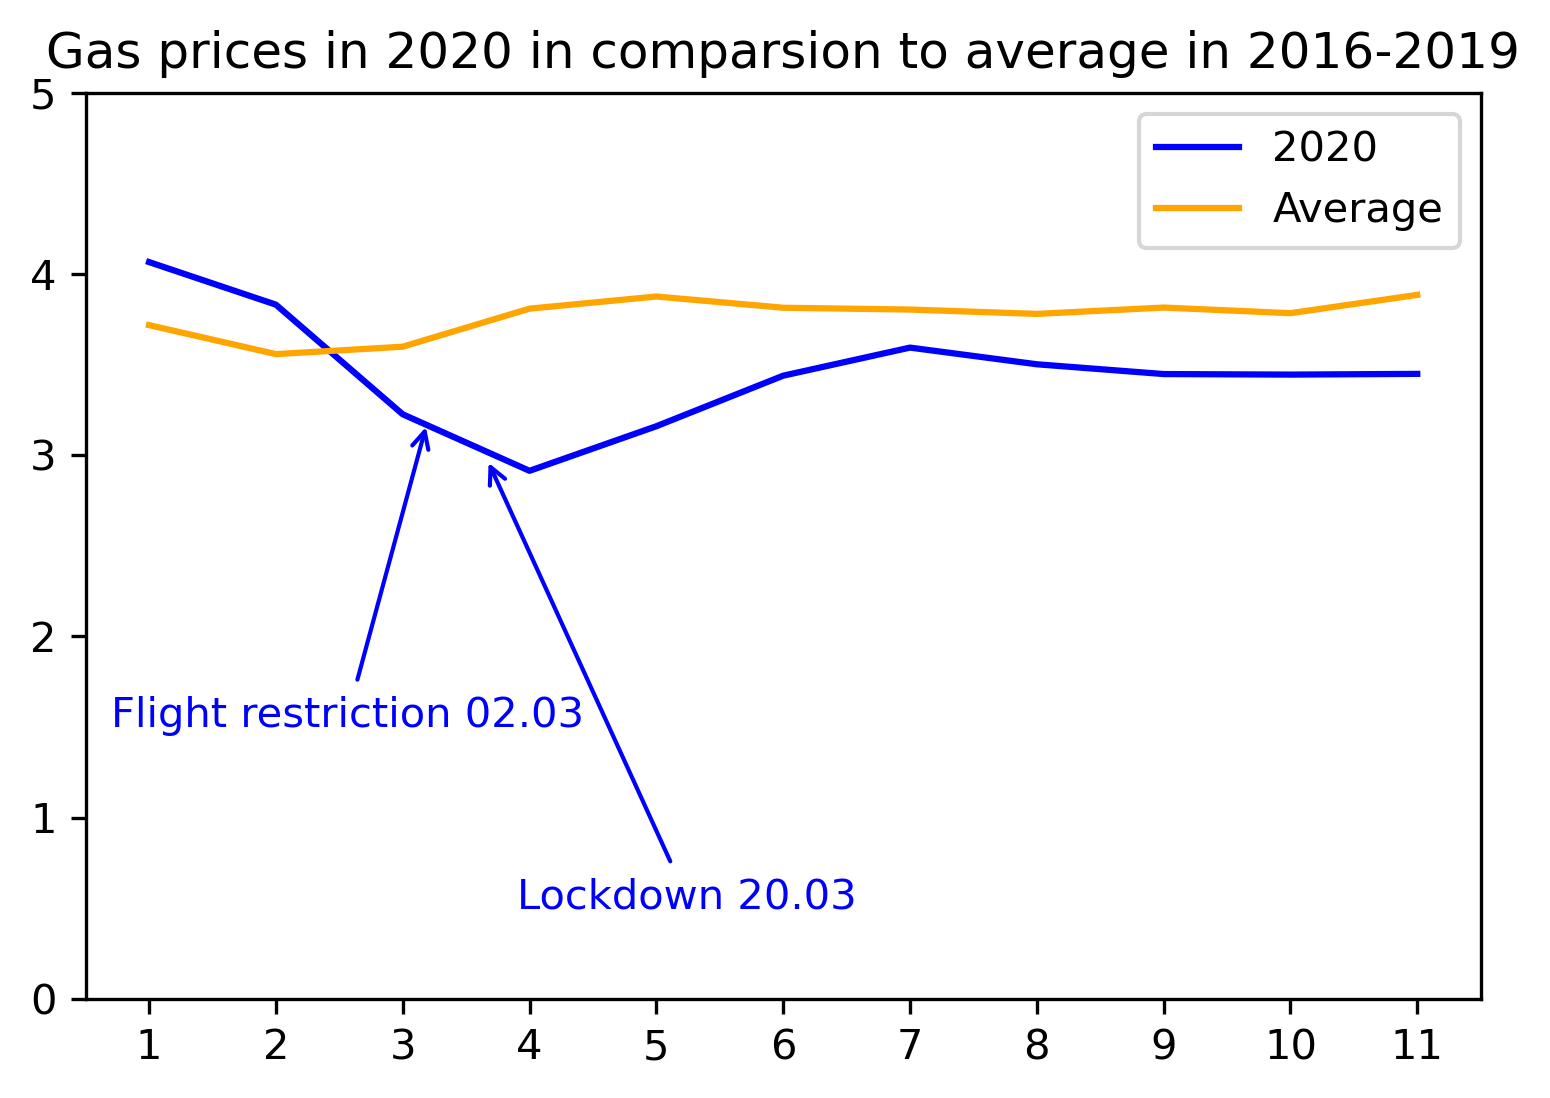

In [9]:
display_png(file="wTomka2")  

### Źródła

* ad 1.: https://utk.gov.pl/pl/raporty-i-analizy/analizy-i-monitoring/statystyka-przewozow-pa
* ad 2.: https://www.ztm.waw.pl/statystyki/?fbclid=IwAR329ZunvUGz0q-tYPR-CN2-T2IJtACn7etl3QC4tOxVVTixN2yLE4HIHME
* ad 3.: https://bdl.stat.gov.pl/BDL/
* ad 4.: https://www.orlen.pl/PL/DlaBiznesu/HurtoweCenyPaliw/Strony/archiwum-cen.aspx?Fuel=Pb98&Year=2016&fbclid=IwAR2X7UUhF0vw7k13YY8faDVYoGaMxEK8d2qnpZxatTRAdTxA3qLty2v1Cmw